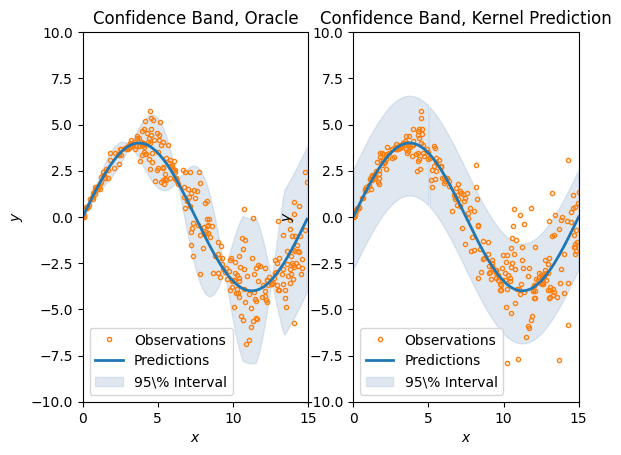

In [11]:
from experiments.plot_utils import plot_xy_specifyBound
import numpy as np
import torch
from NRC.utils import DEFAULT_mean_func, normalZ, Upper_quant, Lower_quant, DEFAULT_hetero_sigma
import matplotlib.pyplot as plt
from NRC.kernel_methods import kernel_estimator

def GENERATE_hetero_noise(
    n_points: int = 1000,
    mean_func = DEFAULT_mean_func,
    std_fun = DEFAULT_hetero_sigma
):
    
    bounds = [0, 15]

    x = np.linspace(bounds[0], bounds[1], n_points)

    f = mean_func(x)
    std = std_fun(x)
    noise = np.random.normal(scale=std)
    y = f + noise
    return f, std, y, x

def CHECK_kernelEsti():

    fig, (ax1, ax2) = plt.subplots(1, 2)

    recal_mean, recal_std, recal_Y, recal_X = GENERATE_hetero_noise(n_points = 4000)
    test_mean, test_std, test_Y, test_X = GENERATE_hetero_noise(n_points = 1000)

    test_Y_UP = test_mean + test_std * normalZ.ppf(Upper_quant)
    test_Y_LO = test_mean + test_std * normalZ.ppf(Lower_quant)

    plot_xy_specifyBound(
        y_pred = test_mean,

        y_UP = test_Y_UP,
        y_LO = test_Y_LO,

        y_true = test_Y,
        x = test_X,
        n_subset = 300,

        ylims = [-10, 10],
        xlims = [0, 15],

        ax = ax1,
        title = "Confidence Band, Oracle"
    )


    # the kernel method to estimate epsilon

    Y_LO_pred, Y_UP_pred = kernel_estimator(
        test_Z = test_X.reshape(-1, 1),
        recal_Z = recal_X.reshape(-1, 1),
        recal_epsilon = recal_Y - recal_mean,
        quants = [Lower_quant, Upper_quant],
        base_kernel = lambda X : (X <= 0.0001).astype(float)
    )

    plot_xy_specifyBound(
        y_pred = test_mean,

        y_UP = Y_UP_pred + test_mean,
        y_LO = Y_LO_pred + test_mean,

        y_true = test_Y,
        x = test_X,
        n_subset = 300,

        ylims = [-10, 10],
        xlims = [0, 15],

        ax = ax2,
        title = "Confidence Band, Kernel Prediction"
    )


    plt.show(block=True)




CHECK_kernelEsti()